In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("ZomatoData.csv", encoding='latin1')

df.shape


(9551, 19)

In [3]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Price range,Votes,Average Cost for two,Rating
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1.804837,156.909748,1199.210763,2.891268
std,8.791521e+06,56.750546,41.467058,11.007935,0.905609,430.169145,16121.183073,1.128845
min,5.300000e+01,1.000000,-157.948486,-41.330428,1.000000,0.000000,0.000000,1.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,1.000000,5.000000,250.000000,2.500000
50%,6.004089e+06,1.000000,77.191964,28.570469,2.000000,31.000000,400.000000,3.200000
75%,1.835229e+07,1.000000,77.282006,28.642758,2.000000,131.000000,700.000000,3.700000
max,1.850065e+07,216.000000,174.832089,55.976980,4.000000,10934.000000,800000.000000,4.900000


from matplotlib import pyplot as plt
_df_0['Restaurant ID'].plot(kind='hist', bins=20, title='Restaurant ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Country Code'].plot(kind='hist', bins=20, title='Country Code')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Longitude'].plot(kind='hist', bins=20, title='Longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Latitude'].plot(kind='hist', bins=20, title='Latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Restaurant ID', y='Country Code', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Country Code', y='Longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Longitude', y='Latitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Latitude', y='Price range', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Restaurant ID'].plot(kind='line', figsize=(8, 4), title='Restaurant ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Country Code'].plot(kind='line', figsize=(8, 4), title='Country Code')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Longitude'].plot(kind='line', figsize=(8, 4), title='Longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Latitude'].plot(kind='line', figsize=(8, 4), title='Latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

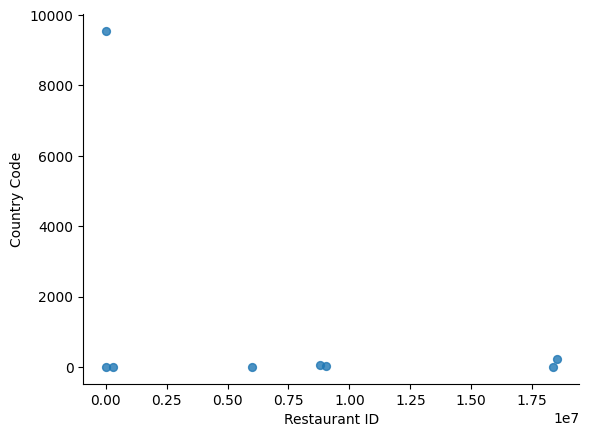

In [27]:
from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Restaurant ID', y='Country Code', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

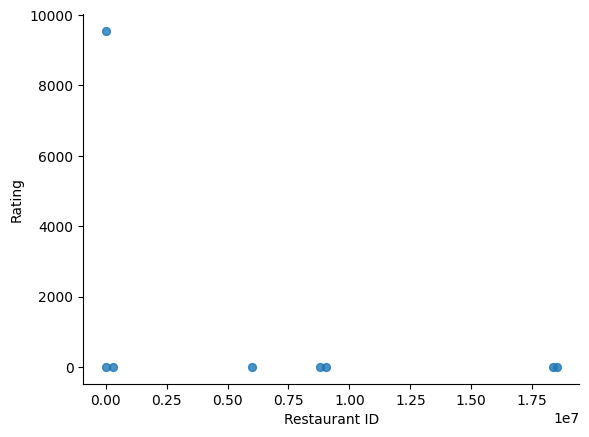

In [28]:
from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Restaurant ID', y='Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

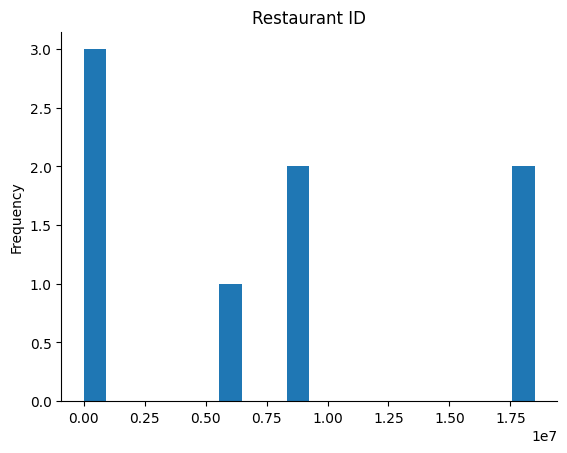

In [26]:
from matplotlib import pyplot as plt
_df_0['Restaurant ID'].plot(kind='hist', bins=20, title='Restaurant ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
df.isnull().sum(axis=1)

df = df.drop_duplicates()




In [7]:
print(df.columns)


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range', 'Votes',
       'Average Cost for two', 'Rating'],
      dtype='object')


In [16]:
df.head()

,Restaurant ID,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
0,6317637,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8


In [20]:
df.drop(['Cuisines','Currency'],axis=1,inplace=True)

In [22]:
df.drop(['Has Table booking','Has Online delivery','Is delivering now','Switch to order menu'],axis=1,inplace=True)

In [23]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


X = df.drop('Rating', axis=1)
y = df['Rating']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

#  Model Evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.08150829565672421


In [24]:
model =LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

#  Model Evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.8999530577866368


In [25]:
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

#  Model Evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.08268109262166407


In [33]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

#  Model Evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.145970695970696


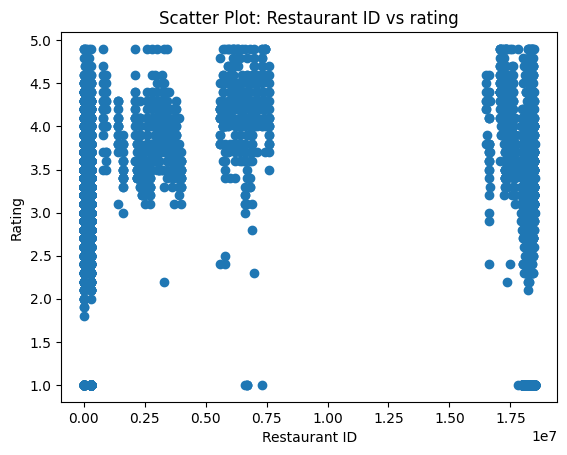

In [32]:
import matplotlib.pyplot as plt

X = df['Restaurant ID']
y = df['Rating']


# Create the scatter plot
plt.scatter(X, y)

# Add labels and title
plt.xlabel('Restaurant ID')
plt.ylabel('Rating')
plt.title('Scatter Plot: Restaurant ID vs rating')

# Show the plot
plt.show()
